In [27]:
# For Google collab add these lines

#from google.colab import output
#output.enable_custom_widget_manager()

In [28]:
# remove "capture" line, if you have any troubles with packages, and try to run again
# %%capture
%pip install ipympl


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
%matplotlib widget

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge, Circle
from numpy import pi

# Task 1

In [31]:
# Given constants
R = 18
O_1O = O_2A = 20
OA = 2 * R
t = np.linspace(0, np.sqrt(R / 6), 200)
OM = 6 * pi * t ** 2
phi = (pi * t ** 3) / 6

In [32]:
# Constant points
O_1 = np.array([0, 0])
O_2 = np.array([OA, 0])
const_points = [(O_1, '$O_1$'), (O_2, '$O_2$')]

In [33]:
# Points of interest
O = [np.cos(phi) * O_1O, np.sin(phi) * O_1O]
Circ_Center = [O[0] + R, O[1]]
A = [np.cos(phi) * O_1O + OA, np.sin(phi) * O_1O]
M = [Circ_Center[0] - R * np.cos(OM / R), Circ_Center[1] + R * np.sin(OM / R)]
points = [(O, '$O$'), (A, '$A$'), (M, '$M$'), (Circ_Center, '$C$')]

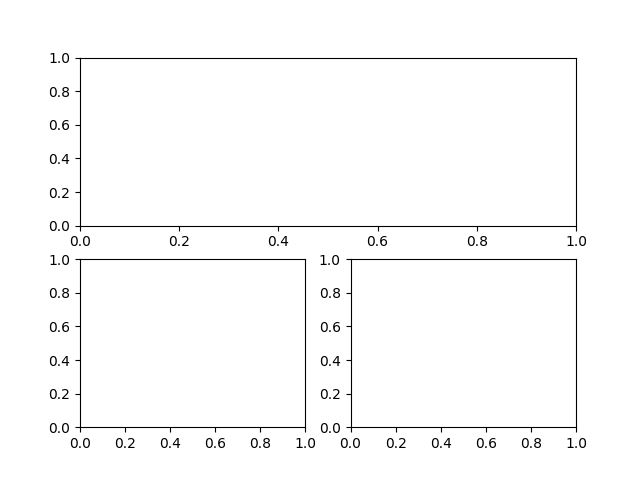

In [34]:
# plot settings
fig = plt.figure()
ax = [plt.subplot(211), plt.subplot(223), plt.subplot(224)]

In [35]:
# velocities, accelerations and their colors
velocities = [[], [], []]
colors_vel = ['red', 'brown', 'pink']
accelerations = [[], [], [], [], []]
colors_acc = ['black', 'green', 'yellow', 'orange', 'violet']

In [36]:
# Animation function
def animate_func(num):
    for a in ax:
        a.clear()
    ax[1].set_title('velocities')
    ax[2].set_title('accelerations')
    ax[0].add_artist(Wedge((Circ_Center[0][num], Circ_Center[1][num]), R, 0, 180))
    ax[1].set_xlim(0, np.sqrt(R / 6))
    ax[1].set_ylim(0, 200)
    ax[2].set_xlim(0, np.sqrt(R / 6))
    ax[2].set_ylim(0, 500)
    ax[0].set_ylim(0, O_1O + R + 2)
    ax[0].set_xlim(- 2 - 3 * O_1O, 3 * O_1O + 2)
    ax[0].set_aspect('equal')
    if 0 < num < len(t):
        # Relative motion
        v_r = (OM[num] - OM[num - 1]) / (t[num] - t[num - 1])
        velocities[0].append(abs(v_r))
        a_r_t = (v_r - ((OM[num - 1] - OM[num - 2]) / (t[num - 1] - t[num - 2]))) / (t[num] - t[num - 1])
        accelerations[1].append(abs(a_r_t))
        a_r_n = v_r ** 2 / R
        accelerations[0].append(a_r_n)
        a_r_n_dir = np.array([Circ_Center[0][num] - M[0][num], Circ_Center[1][num] - M[1][num]]) \
                    / np.linalg.norm(np.array([Circ_Center[0][num] - M[0][num], Circ_Center[1][num] - M[1][num]]))
        a_r_t_dir = np.array([-a_r_n_dir[1], a_r_n_dir[0]]) * np.sign(a_r_t)
        v_r_dir = np.array([-a_r_n_dir[1], a_r_n_dir[0]]) * np.sign(v_r)
        ax[0].quiver([M[0][num]], [M[1][num]], [v_r_dir[0]], [v_r_dir[1]],  # Point A
                     scale=0.05, scale_units='xy', color="red", width=0.005)
        ax[0].quiver([M[0][num]], [M[1][num]], [a_r_n_dir[0]], [a_r_n_dir[1]],  # Point A
                     scale=0.1, scale_units='xy', color="black", width=0.005)
        ax[0].quiver([M[0][num]], [M[1][num]], [a_r_t_dir[0]], [a_r_t_dir[1]],  # Point A
                     scale=0.1, scale_units='xy', color="green", width=0.005)

        # Transport motion
        v_t = (O_1O * phi[num] - O_1O * phi[num - 1]) / (t[num] - t[num - 1])
        velocities[1].append(abs(v_t))
        a_t_t = O_1O * ((phi[num] - phi[num - 1]) / (t[num] - t[num - 1]) -
                        (phi[num - 1] - phi[num - 2]) / (t[num - 1] - t[num - 2])) / (t[num] - t[num - 1])
        accelerations[3].append(abs(a_t_t))
        a_t_n = O_1O * ((phi[num] - phi[num - 1]) / (t[num] - t[num - 1])) ** 2
        accelerations[2].append(a_t_n)
        a_t_n_dir = np.array([O_1[0] - O[0][num], O_1[1] - O[1][num]]) \
                    / np.linalg.norm(np.array([O_1[0] - O[0][num], O_1[1] - O[1][num]]))
        a_t_t_dir = np.array([a_t_n_dir[1], -a_t_n_dir[0]]) * np.sign(a_t_t)
        v_t_dir = np.array([a_t_n_dir[1], -a_t_n_dir[0]]) * np.sign(v_t)
        ax[0].quiver([M[0][num]], [M[1][num]], [v_t_dir[0]], [v_t_dir[1]],  # Point A
                     scale=0.05, scale_units='xy', color="brown", width=0.005)
        ax[0].quiver([M[0][num]], [M[1][num]], [a_t_n_dir[0]], [a_t_n_dir[1]],  # Point A
                     scale=0.1, scale_units='xy', color="yellow", width=0.005)
        ax[0].quiver([M[0][num]], [M[1][num]], [a_t_t_dir[0]], [a_t_t_dir[1]],  # Point A
                     scale=0.1, scale_units='xy', color="orange", width=0.005)

        # Total motion
        v = np.linalg.norm(np.array(abs(v_t) * v_t_dir + abs(v_r) * v_r_dir))
        v_dir = np.array(abs(v_t) * v_t_dir + abs(v_r) * v_r_dir) / v
        velocities[2].append(v)
        a = np.linalg.norm(np.array(abs(a_t_n) * a_t_n_dir + abs(a_t_t) * a_t_t_dir
                                    + abs(a_r_t) * a_r_t_dir + abs(a_r_n) * a_r_n_dir))
        a_dir = np.array(abs(a_t_n) * a_t_n_dir + abs(a_t_t) * a_t_t_dir
                                    + abs(a_r_t) * a_r_t_dir + abs(a_r_n) * a_r_n_dir) / a
        accelerations[4].append(a)
        ax[0].quiver([M[0][num]], [M[1][num]], [v_dir[0]], [v_dir[1]],  # Point A
                     scale=0.05, scale_units='xy', color="pink", width=0.005)
        ax[0].quiver([M[0][num]], [M[1][num]], [a_dir[0]], [a_dir[1]],  # Point A
                     scale=0.1, scale_units='xy', color="violet", width=0.005)

        for i in range(len(velocities)):
            ax[1].plot(t[:num], velocities[i][:num], color=colors_vel[i])

        for i in range(len(accelerations)):
            ax[2].plot(t[:num], accelerations[i][:num], color=colors_acc[i])

    for point in const_points:
        ax[0].plot(point[0][0], point[0][1], marker="o", markersize=3, markeredgecolor="black",
                   markerfacecolor="black")
        ax[0].text(point[0][0] + 0.3, point[0][1] + 0.3, point[1])
    for point in points:
        ax[0].plot(point[0][0][num], point[0][1][num], marker="o", markersize=3, markeredgecolor="black",
                   markerfacecolor="black")
        ax[0].text(point[0][0][num] + 0.3, point[0][1][num] + 0.3, point[1])
    ax[0].plot([O_1[0], O[0][num]], [O_1[1], O[1][num]], linewidth=0.7, linestyle="dashed", color="blue")
    ax[0].plot([O_2[0], A[0][num]], [O_2[1], A[1][num]], linewidth=0.7, linestyle="dashed", color="blue")
    ax[0].legend(['mechanism', 'relative velocity', 'relative normal acceleration', 'relative tangential acceleration',
                  'transport velocity', 'transport normal acceleration', 'transport tangential acceleration',
                  'total velocity', 'total acceleration'], loc='upper left', bbox_to_anchor=(-0.15, 1.55))

In [37]:
# Creating .gif and saving it
line_ani = FuncAnimation(fig, animate_func, frames=len(t))
writergif = animation.PillowWriter(fps=60)
line_ani.save("task1.gif", dpi=300, writer=writergif)
plt.close('all')

# Task 2

In [38]:
# Given constants
R = 30
t = np.linspace(0, 2, 100)
OM = 75 * pi * (0.1 * t + 0.3 * t ** 2)
phi = 2 * t - 0.3 * t ** 2

In [39]:
# Constant points
O_1 = np.array([0, 0])
const_points = [(O_1, '$O_1$')]

In [40]:
# Points of interest
O = [np.cos(phi + pi / 4) * R * np.sqrt(2), np.sin(phi + pi / 4) * R * np.sqrt(2)]
D = [np.cos(phi + pi / 2) * R, np.sin(phi + pi / 2) * R]
M = [D[0] + R * np.cos(OM / R + phi), D[1] + R * np.sin(OM / R + phi)]
points = [(O, '$O$'), (M, '$M$'), (D, '$D$')]

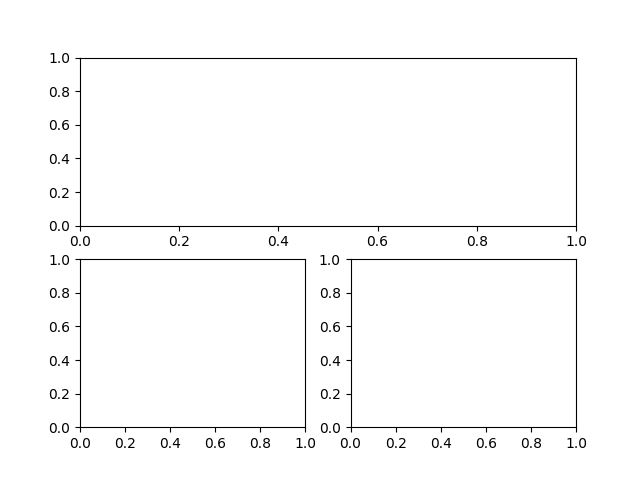

In [41]:
# plot settings
fig = plt.figure()
ax = [plt.subplot(211), plt.subplot(223), plt.subplot(224)]

In [42]:
# velocities, accelerations and their colors
velocities = [[], [], []]
colors_vel = ['red', 'brown', 'pink']
accelerations = [[], [], [], [], [], []]
colors_acc = ['black', 'green', 'yellow', 'orange', 'violet', 'navy']

In [43]:
# Animation function
def animate_func(num):
    for a in ax:
        a.clear()
    ax[0].add_artist(Circle((D[0][num], D[1][num]), R, fill=False))
    ax[1].set_title('velocities')
    ax[2].set_title('accelerations')
    ax[1].set_xlim(0, 2)
    ax[1].set_ylim(0, 300)
    ax[2].set_xlim(0, 2)
    ax[2].set_ylim(0, 3000)
    ax[0].set_ylim(-2 - 2 * R, 2 + 2 * R)
    ax[0].set_xlim(- 2 - 2 * R, 2 * R + 2)
    ax[0].set_aspect('equal')
    if 0 < num < len(t):
        # Relative motion
        v_r = (OM[num] - OM[num - 1]) / (t[num] - t[num - 1])
        velocities[0].append(abs(v_r))
        a_r_t = (v_r - ((OM[num - 1] - OM[num - 2]) / (t[num - 1] - t[num - 2]))) / (t[num] - t[num - 1])
        accelerations[1].append(abs(a_r_t))
        a_r_n = v_r ** 2 / R
        accelerations[0].append(a_r_n)
        a_r_n_dir = np.array([D[0][num] - M[0][num], D[1][num] - M[1][num]]) \
                    / np.linalg.norm(np.array([D[0][num] - M[0][num], D[1][num] - M[1][num]]))
        a_r_t_dir = np.array([-a_r_n_dir[1], a_r_n_dir[0]]) * np.sign(a_r_t)
        v_r_dir = np.array([-a_r_n_dir[1], a_r_n_dir[0]]) * np.sign(v_r)
        ax[0].quiver([M[0][num]], [M[1][num]], [v_r_dir[0]], [v_r_dir[1]],  # Point A
                     scale=0.02, scale_units='xy', color="red", width=0.009)
        ax[0].quiver([M[0][num]], [M[1][num]], [a_r_n_dir[0]], [a_r_n_dir[1]],  # Point A
                     scale=0.04, scale_units='xy', color="black", width=0.009)
        ax[0].quiver([M[0][num]], [M[1][num]], [a_r_t_dir[0]], [a_r_t_dir[1]],  # Point A
                     scale=0.04, scale_units='xy', color="green", width=0.009)

        # Transport motion
        O_1M = np.sqrt((M[0][num] - O_1[0]) ** 2 + (M[1][num] - O_1[1]) ** 2)
        v_t = O_1M * (phi[num] - phi[num - 1]) / (t[num] - t[num - 1])
        velocities[1].append(abs(v_t))
        a_t_t = O_1M * ((phi[num] - phi[num - 1]) / (t[num] - t[num - 1]) -
                        (phi[num - 1] - phi[num - 2]) / (t[num - 1] - t[num - 2])) / (t[num] - t[num - 1])
        accelerations[3].append(abs(a_t_t))
        a_t_n = O_1M * ((phi[num] - phi[num - 1]) / (t[num] - t[num - 1])) ** 2
        accelerations[2].append(a_t_n)
        a_t_n_dir = np.array([O_1[0] - O[0][num], O_1[1] - O[1][num]]) \
                    / np.linalg.norm(np.array([O_1[0] - O[0][num], O_1[1] - O[1][num]]))
        a_t_t_dir = np.array([a_t_n_dir[1], -a_t_n_dir[0]]) * np.sign(a_t_t)
        v_t_dir = np.array([a_t_n_dir[1], -a_t_n_dir[0]]) * np.sign(v_t)
        a_c = v_t * (phi[num] - phi[num - 1]) / (t[num] - t[num - 1])
        a_c_dir = -a_r_n_dir * np.sign(a_c)
        accelerations[5].append(abs(a_c))
        ax[0].quiver([M[0][num]], [M[1][num]], [v_t_dir[0]], [v_t_dir[1]],  # Point A
                     scale=0.02, scale_units='xy', color="brown", width=0.009)
        ax[0].quiver([M[0][num]], [M[1][num]], [a_t_n_dir[0]], [a_t_n_dir[1]],  # Point A
                     scale=0.04, scale_units='xy', color="yellow", width=0.009)
        ax[0].quiver([M[0][num]], [M[1][num]], [a_t_t_dir[0]], [a_t_t_dir[1]],  # Point A
                     scale=0.04, scale_units='xy', color="orange", width=0.009)

        # Total motion
        v = np.linalg.norm(np.array(v_t * v_t_dir + v_r * v_r_dir))
        v_dir = np.array(abs(v_t) * v_t_dir + abs(v_r) * v_r_dir) / v
        velocities[2].append(v)
        a = np.linalg.norm(np.array(abs(a_t_n) * a_t_n_dir + abs(a_t_t) * a_t_t_dir
                                    + abs(a_r_t) * a_r_t_dir + abs(a_r_n) * a_r_n_dir))
        a_dir = np.array(abs(a_t_n) * a_t_n_dir + abs(a_t_t) * a_t_t_dir
                         + abs(a_r_t) * a_r_t_dir + abs(a_r_n) * a_r_n_dir) / a
        accelerations[4].append(a)
        ax[0].quiver([M[0][num]], [M[1][num]], [v_dir[0]], [v_dir[1]],  # Point A
                     scale=0.02, scale_units='xy', color="pink", width=0.009)
        ax[0].quiver([M[0][num]], [M[1][num]], [a_dir[0]], [a_dir[1]],  # Point A
                     scale=0.04, scale_units='xy', color="violet", width=0.009)
        ax[0].quiver([M[0][num]], [M[1][num]], [a_c_dir[0]], [a_c_dir[1]],  # Point A
                     scale=0.04, scale_units='xy', color="navy", width=0.009)

        for i in range(len(velocities)):
            ax[1].plot(t[:num], velocities[i][:num], color=colors_vel[i])

        for i in range(len(accelerations)):
            ax[2].plot(t[:num], accelerations[i][:num], color=colors_acc[i])

    for point in const_points:
        ax[0].plot(point[0][0], point[0][1], marker="o", markersize=3, markeredgecolor="black",
                   markerfacecolor="black")
        ax[0].text(point[0][0] + 0.3, point[0][1] + 0.3, point[1])
    for point in points:
        ax[0].plot(point[0][0][num], point[0][1][num], marker="o", markersize=3, markeredgecolor="black",
                   markerfacecolor="black")
        ax[0].text(point[0][0][num] + 0.3, point[0][1][num] + 0.3, point[1])
    ax[0].legend(['mechanism', 'relative velocity', 'relative normal acceleration', 'relative tangential acceleration',
                  'transport velocity', 'transport normal acceleration', 'transport tangential acceleration',
                  'total velocity', 'total acceleration', 'coriolis acceleration'], loc='upper right',
                 bbox_to_anchor=(0.3, 1.5))

In [44]:
# Creating .gif and saving it
line_ani = FuncAnimation(fig, animate_func, frames=len(t))
writergif = animation.PillowWriter(fps=60)
line_ani.save("task2.gif", dpi=300, writer=writergif)
plt.close('all')